## Implementacion de un clasificador Bayesiano
Algo a lo que probablemente todas las personas hoy en día estamos acostumbradas es a recibir bastantes mails de spam todos los días. Aunque la definición de spam es amplia y podría abarcar desde mails sobre una "herencia millonaria" en Sudáfrica hasta grupos de trabajo demasiado "activos"; vamos a quedarnos únicamente con los primeros.

Estos mails se caracterizan por contener información falsa, promociones no deseadas, suplementación de identidad,  y otras técnicas incluso más graves. Vamos a progamar un clasificador que distinga entre mails de spam y mails buenos (ham).


In [1]:
# Importar los datos
import pandas as pd
mail_data = pd.read_csv("naives_spam_data.csv", encoding="iso-8859-1")
print(mail_data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


## Paso 1: Analizar y limpiar los datos
Los datos absolutamente siempre necesitan ser inspeccionados, filtrados, ordenados, etc.

In [2]:
# Eliminamos columnas Nan
datalimpio = mail_data.dropna(axis=1, how='any') 
print(datalimpio.head(10))

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [3]:
# Ponemos encabezados a las columnas
datalimpio.columns = ['class', 'text']
print(datalimpio.head(10))

  class                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [45]:
# Exploramos cuantos datos tenemos de cada clase
datalimpio.groupby('class').describe()


text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

### Algunas observaciones
Vemos que alrededor del 15% de los mensajes que tenemos en el set son spam
Que hay algunos mensajes que se repiten exactamente

### Continuamos haciendo un análisis exploratorio del problema
Longitud del mensaje


In [46]:
# Creamos una nueva columna con la longitud del mensaje
datalimpio = datalimpio.assign(longitud=datalimpio['text'].apply(len).values)
print(datalimpio.head(10))

  class                                               text  longitud
0   ham  Go until jurong point, crazy.. Available only ...       111
1   ham                      Ok lar... Joking wif u oni...        29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       155
3   ham  U dun say so early hor... U c already then say...        49
4   ham  Nah I don't think he goes to usf, he lives aro...        61
5  spam  FreeMsg Hey there darling it's been 3 week's n...       148
6   ham  Even my brother is not like to speak with me. ...        77
7   ham  As per your request 'Melle Melle (Oru Minnamin...       160
8  spam  WINNER!! As a valued network customer you have...       158
9  spam  Had your mobile 11 months or more? U R entitle...       154


Text(0,0.5,'Probability')

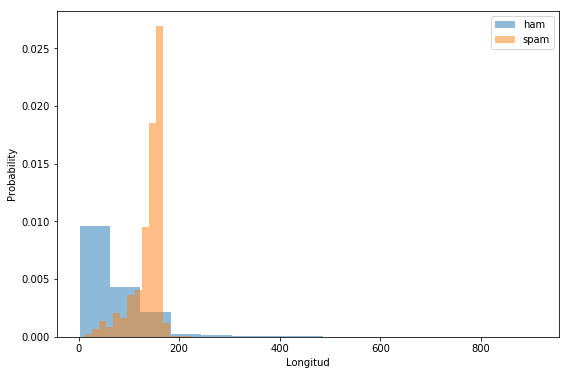

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

# Creamos la figura
plt.figure(figsize=[9,6])

# Dibujamos los histogramas normalizados, transparencias...
plt.hist(datalimpio[datalimpio["class"] == "ham"].longitud, bins=15, label = "ham", density=True, alpha = 0.5)
plt.hist(datalimpio[datalimpio["class"] == "spam"].longitud, bins=15, label = "spam", density=True, alpha = 0.5)
plt.legend(loc='upper right')
plt.xlabel("Longitud")
plt.ylabel("Probability")

#datalimpio.hist(column='longitud',by='class',bins=30, figsize=(15,6))



## Modelo 1: Buscar el punto de corte de las distribuciones

## Modelo 2: Tener en cuenta frecuencia de las palabras

In [200]:
# Vamos a convertir nuestra tabla en un diccionario. Otra forma de representacion

message_dict = {}  
for i in range(len(datalimpio)):
    message_dict[datalimpio["text"][i]] = datalimpio["class"][i]

labels = list(message_dict.values())

# Convertir las etiquetas en numeros. ham es 1, spam será el 2
labels = [1 if x == "ham" else 2 for x in labels]
messages_temp = list(message_dict.keys())

In [207]:
# Limpiamos los datos

import re
messages = []
for msg in messages_temp:
    output = re.sub(r'\d+', ' ', msg) # Sustituir numeros con spacios
    output = re.sub(r"\s+", " ", output) # Sustituir spacios con uno solo
    output = output.strip() #Elimina espacios previos y posteriores
    messages.append(output)

In [214]:
print("Mensajes Limpios")
print("=================\n")
for i in range(5):
    print(str(i+1) + ". " + messages[i])

Mensajes Limpios

1. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2. Ok lar... Joking wif u oni...
3. Free entry in a wkly comp to win FA Cup final tkts st May . Text FA to to receive entry question(std txt rate)T&C's apply over 's
4. U dun say so early hor... U c already then say...
5. Nah I don't think he goes to usf, he lives around here though


### Representation de lso datos
Ahora necesitamos convertir todos estos datos en una tabla de frecuencias para que el clasificador bayesiano pueda computar las probabilidades condicionadas

Vamos a tokenizar los mensajes: 

```
(1) Juan quiere ver una pelicula. Maria no.
(2) Juan tambien quiere comer.
```

Conviertiendolos en
```
 "Juan"
 "quiere"
 "ver"
 "una"
 "pelicula"
 "Maria"
 "no"
 "tambien"
 "comer"

Frequency of vocabulary:


| Word     | Frequency |
|----------|-----------|
| Juan     |     2     |
| quiere   |     2     |
| ver      |     1     |
| una      |     1     |
| pelicula |     1     |
| Maria    |     1     |
| no       |     1     |
| tambien  |     1     |
| comer    |     1     |


La representacion de una frase sera:

| Sentence                       | Juan | quiere | ver | una | pelicula | Maria | tambien | comer |
|--------------------------------|------|--------|-----|-----|----------|-------|---------|-------|
| Juan tambien quiere comer      | 1    |  1     |  0  | 0   | 0        | 0     | 1       | 1     |


Se convierte en una matriz donde las columnas son los "features" o posible vocabulario

#### CountVectorizer

[CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) es una funcion que nos hace la vida más fácil [scikit-learn](http://scikit-learn.org/stable/index.html). 

- Tokenizacion del texto. — Vectorizacion y tokenizacion
- Eliminar palabras poco frecuentes
- Eliminar palabras que ocurren demasiado
- Eliminar palabras que probablemente no vuelvan a ocurrir.


In [217]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5, # frecuencia minima para ser considerada vocabulario
                             ngram_range=(1, 1), # tokenizacion como n-gramas, usamos 1 ngrama
                            )
vect = vectorizer.fit_transform(messages)

In [218]:
print(vect[1,0:1400])
print(messages[1])

  (0, 675)	1
  (0, 707)	1
  (0, 935)	1
Ok lar... Joking wif u oni...


In [230]:
print ("Vocabulario total: ", len(vectorizer.get_feature_names()))
print("\nMuestra del vocabulario o features")
print("=======================\n")

for i, value in enumerate(vectorizer.get_feature_names()):
    if i < 20:
        print(value)

Vocabulario total:  1609

Muestra del vocabulario o features

abiola
able
about
abt
ac
acc
access
account
across
activate
actually
ad
add
added
address
admirer
advance
advice
aft
after


In [221]:
num_samples, num_features = vect.shape
print("Numero total de mensajes: ", num_samples)
print("Numero total de features (vocabulario): ", num_features)

Numero total de mensajes:  5169
Numero total de features (vocabulario):  1609


## Train set, Test set

In [223]:
# Dividimos entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vect, labels, test_size=0.3, random_state=0)

## Entrenamos el modelo con los datos de train

In [227]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() # Inicializar el clasificador
clf.fit(X_train, y_train) # Entrenar el modelo con los datos de train

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testeamos el modelo con los datos que hemos guardado para el test


In [228]:
y_pred_mnb = clf.predict(X_test) 

## Precisión de nuestro modelo

In [231]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred_mnb)
print("Precisión del modelo es: ", result)

Precisión del modelo es:  0.9800128949065119
